# BEV2Seg_2 Evaluation

In [4]:
import pickle
import warnings
import numpy as np
import pandas as pd

import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%cd /workspaces/bev2seg_2/

DATA_PATH = "./data/model_evaluations.pkl"

/workspaces/bev2seg_2


## Run Evaluations

In [18]:
!python3 scripts/evaluate_bev2seg_2.py --dataset_path ./tmp/NuImagesFormatted --model_path ./models/segformer_nu_formatted/raw2segbev_mit-b0_v0.3 --output_path ./data/model_evaluations.pkl

Traceback (most recent call last):
  File "/workspaces/bev2seg_2/scripts/evaluate_bev2seg_2.py", line 11, in <module>
    from src.bev2seg_2 import Raw2Seg_BEV, Raw_BEV2Seg
ModuleNotFoundError: No module named 'src'


## Results Visualization 

In [12]:
"""
data = {
    'model_name':{
        'model_path': str,
        'model_size': int,
        'evaluation_type':{
            'description': str,
            'labels': List,
            'colors': List,        
            'mean_precision_per_class': np.ndarray,
            'mean_recall_per_class': np.ndarray,
            'mean_accuracy_per_class': np.ndarray,
            'mean_f1score_per_class': np.ndarray,
            'mean_iou_per_class': np.ndarray,
            'conf_matrix': np.ndarray
        }
    }
}
"""

data = None
with open(DATA_PATH, "rb") as f:
    data = pickle.load(f)

def show_evaluated_models(data:dict):
    evaluated_models = list(data.keys())
    saved_eval_types = []
    results = []
    for model in evaluated_models:
        evals = list(data[model].keys())
        evals.sort()
        for e in evals:
            if isinstance(data[model][e], dict):
                continue # model_path and model_size
            if e not in saved_eval_types:
                saved_eval_types.append([e, data[model][e]['description']])
        results.append([model, evals])
    inf = tabulate(saved_eval_types, headers=['Evaluation type', 'Description'])
    res = tabulate(results, headers=['Model Name', 'Evaluation types saved'])

    print(inf)
    print(f"\nSAVED EVALUATIONS IN {DATA_PATH}:")
    print(res)


def plot_segmentation_legend(model):
    # TODO: adaptar esto para recibir el modelo como input

    fig, ax = plt.subplots(figsize=(6, 4))
    for i, label in enumerate(nulabels):
        print(f"{label.color}, {label.name}")
        col = tuple(c/255 for c in label.color)
        ax.add_patch(plt.Rectangle((0, i), 1, 1, color= col))
        ax.text(1.05, i + 0.5, label.name, va='center', ha='left', fontsize=12)

    # Ajustar los límites y el aspecto del gráfico
    ax.set_xlim(0, 2)
    ax.set_ylim(0, len(nulabels))
    ax.axis('off')  # Para no mostrar los ejes

    # Mostrar el gráfico
    plt.show()


show_evaluated_models(data)

  Evaluation type  Description
-----------------  ----------------------------------------------------------
                1  [Raw -> Seg -> BEV] model evaluated with BEVDataset
                2  [Raw -> Seg] model evaluated with NuImagesFormattedDataset

SAVED EVALUATIONS IN ./data/model_evaluations.pkl:
Model Name              Evaluation types saved
----------------------  ------------------------
raw2segbev_mit-b0_v0.3  [1, 2]


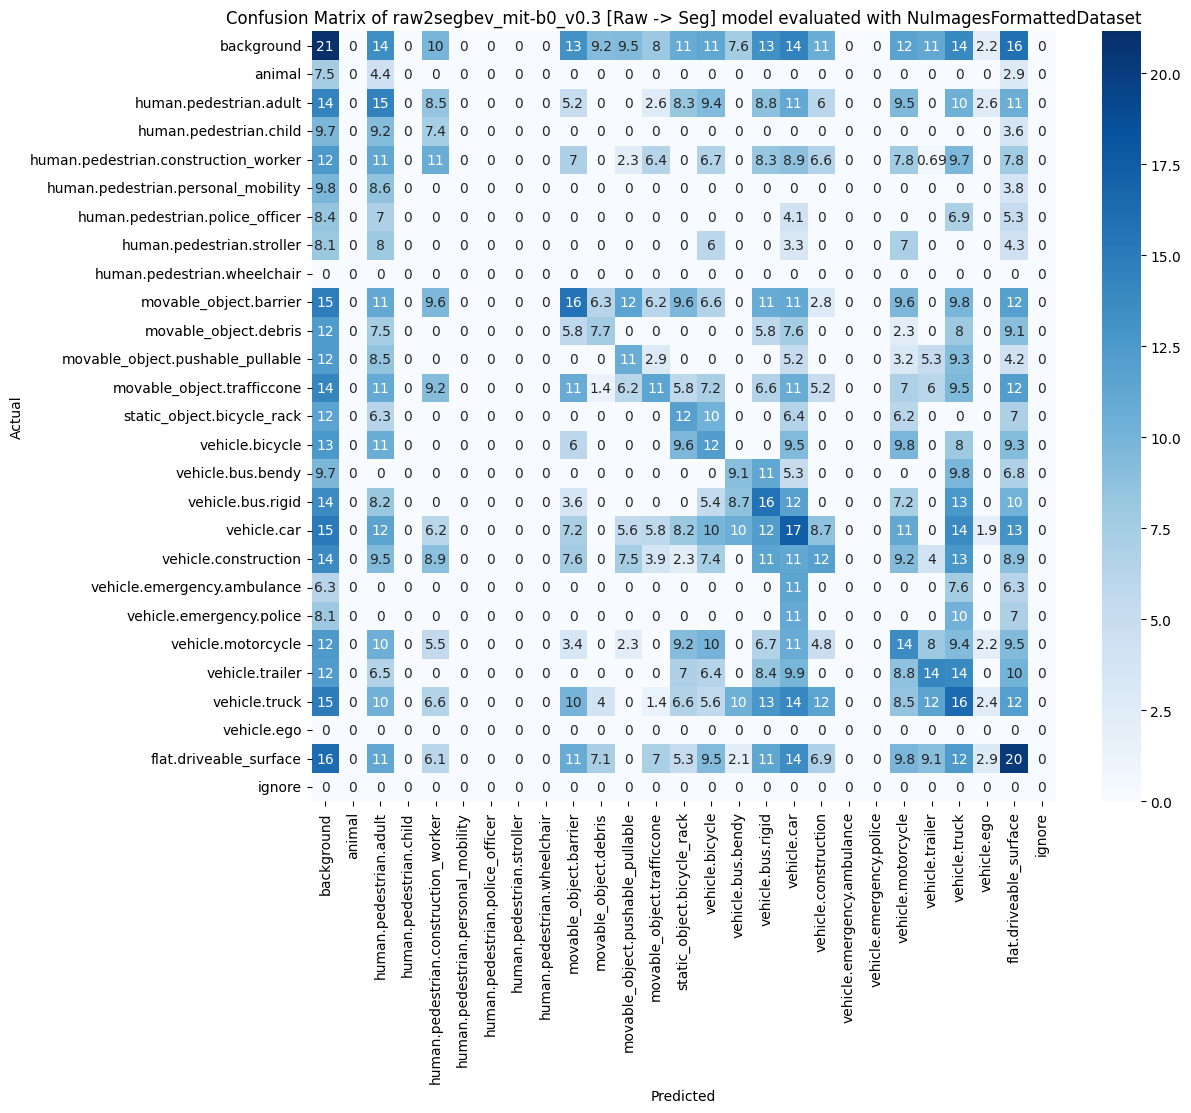

In [17]:
def show_conf_matrix(data:dict, model_name:str, eval_type:int):
    assert model_name in data
    assert eval_type in data[model_name]
    
    model_data = data[model_name][eval_type]
    desc = data[model_name][eval_type]['description']

    conf_matrix = pd.DataFrame(model_data['conf_matrix'], index=model_data['labels'], columns=model_data['labels'])
    conf_matrix = np.log1p(conf_matrix) # Escalado logarítmico

    plt.figure(figsize=(12, 10))
    sns.heatmap(conf_matrix, annot=True, cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix of {model_name} {desc}")
    plt.show()

show_conf_matrix(data, "raw2segbev_mit-b0_v0.3", 2)

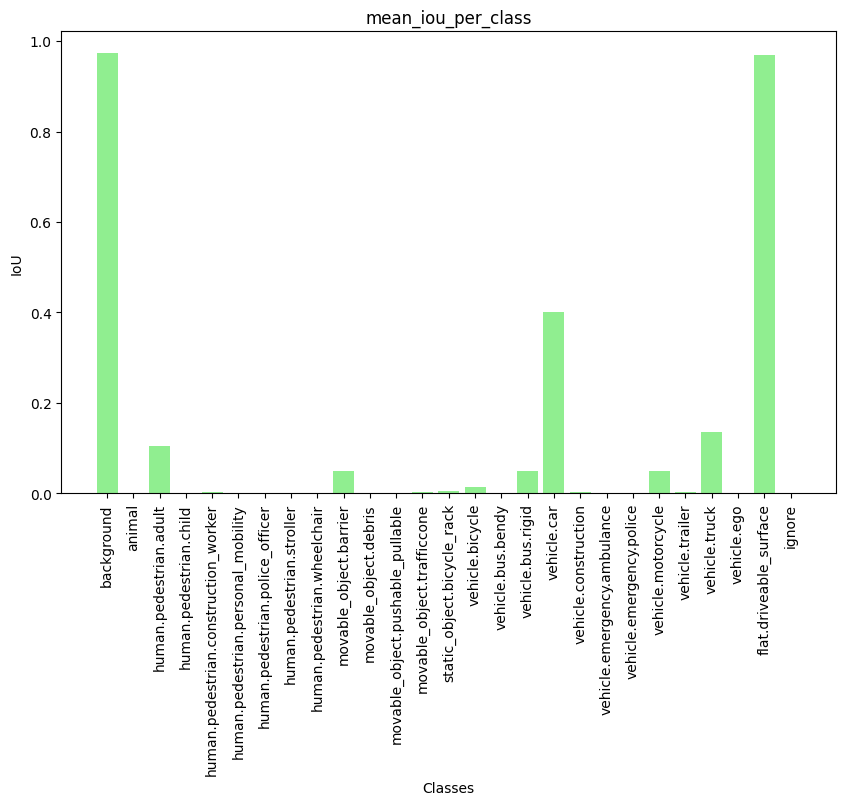

In [89]:
def plot_mean_iou_per_class(mean_iou_per_class, title = 'mean_iou_per_class', ax=None, labels_list=None, colors=None):
    if labels_list is None:
        labels_list = range(len(mean_iou_per_class))
    if colors is None:
        colors = 'skyblue'

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(labels_list, mean_iou_per_class, color=colors)
    plt.xlabel('Classes')
    plt.xticks(rotation=90)
    plt.ylabel('IoU')
    plt.show()

plot_mean_iou_per_class(model_data['mean_iou_per_class'], labels_list=model_data['labels'], colors='lightgreen')